# Signal processing for bio-image analysts.

## Mean and standard deviation

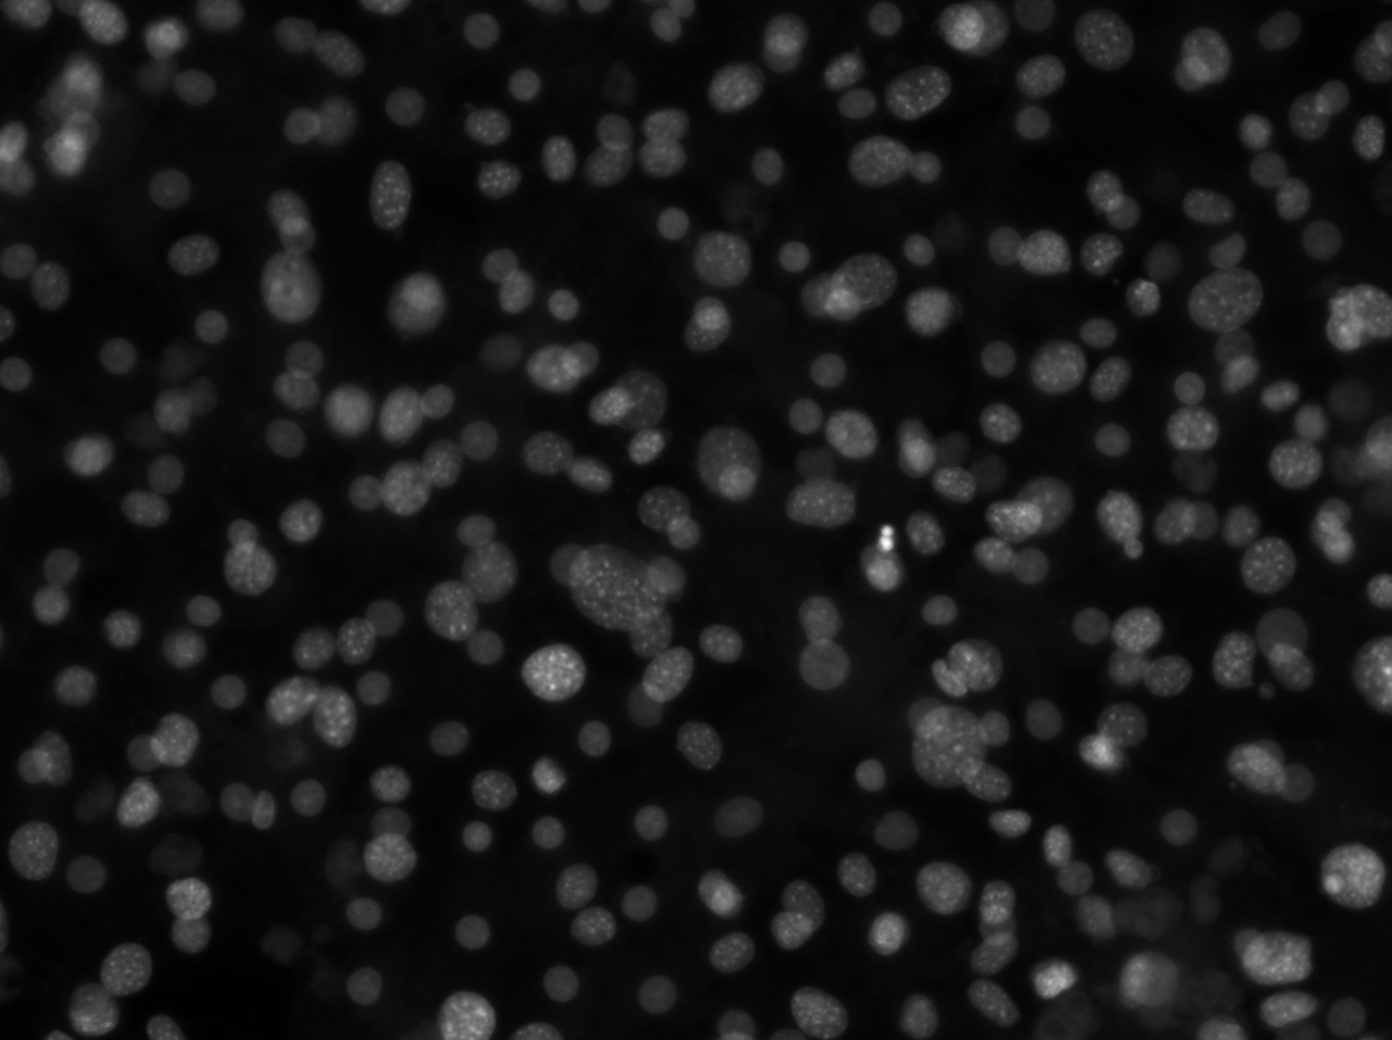

null

In [15]:
%%groovy
import net.imglib2.img.display.imagej.ImageJFunctions
image = ij2.io().open("../data/BBBC026_v1_images/ADSASS092408-GHAD2-D6-20x_A07_s6_w1B35E1720-04BE-44D3-BE72-AD698EDAFC72.png")
ip = ImageJFunctions.wrap(image, "cells")
ip.getProcessor().setMinAndMax(ip.getProcessor().getStatistics().min, 
                               ip.getProcessor().getStatistics().max)
beakerx.pixels = ip.getProcessor().getPixels()
beakerx.width = image.getWidth()
beakerx.height = image.getHeight()
display(Image(ip.getBufferedImage()))

In [14]:
%%groovy
beakerx.mean = ij2.op().stats().mean(image)
beakerx.stdDev = ij2.op().stats().stdDev(image)
println("mean: " + beakerx.mean)
println("stddev: " + beakerx.stdDev)

mean: 25.695266909814325
stddev: 18.073448323495324


null

(1040, 1392)


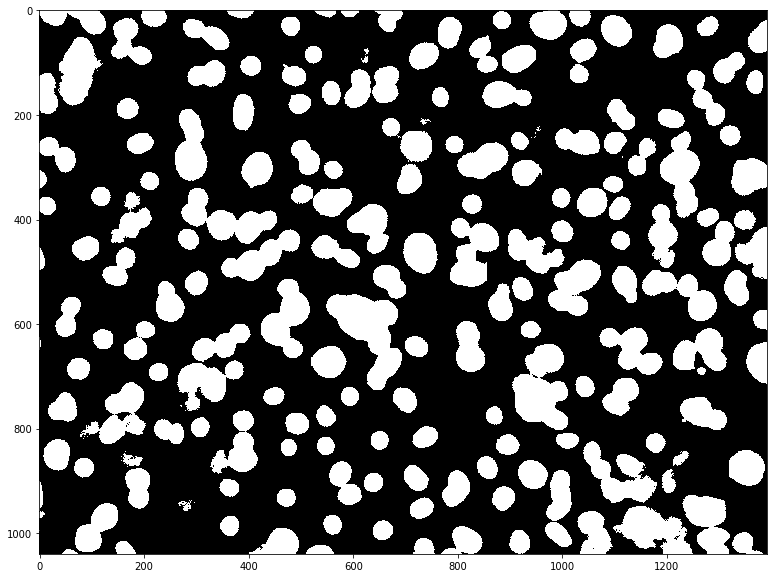

In [39]:
import numpy
from beakerx.object import beakerx
from matplotlib import pyplot as plt

imArray = numpy.array(beakerx.pixels, dtype='uint8')
imArray = numpy.reshape(imArray, (beakerx.height, beakerx.width))
print(imArray.shape)
mask = numpy.zeros(imArray.shape, dtype=int)
mask[imArray>beakerx.mean]=255
plt.figure(figsize=(14, 10))
plt.imshow(mask, interpolation='none', cmap='gray')
plt.show()

In [1]:
%%groovy
%classpath add jar ../Fiji.app/jars/*
%classpath add jar ../Fiji.app/jars/bio-formats/*
currentPath = System.getProperty("java.library.path")
newPath = currentPath + ":../Fiji.app/lib/linux64"
System.setProperty( "java.library.path", newPath )
import net.imagej.ImageJ
ij2 = new ImageJ()

Groovy started successfully



net.imagej.ImageJ@6e7f243c